# Tema 19: Fundamentos de modelado estadístico

Esta es la última lección de la unidad y el objetivo es demostrar algunos fundamentos del análisis estadístico por modelos.

Comenzaremos por construir manualmente una regresión lineal bivariada, luego veremos cómo se realiza el procedimiento con `scipy` y finalmente, veremos cómo ejecutar un modelo de mínimos cuadrados ordinarios multivariado utilizando `statsmodels`.

:::{important}
Para esta libreta, deberás tener instalado `statsmodels` además de las librerías que se utilizaron en esta lección.
Si no lo haz hecho, puedes agregar la librería a tu entorno con `uv add statsmodels`. Esta librería también ya está preinstalada en `colab`.
:::

## Librerías


In [20]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
print('librerías cargadas')

librerías cargadas


## Datos

In [2]:
url = 'https://raw.githubusercontent.com/raphaelvallat/pingouin/refs/heads/main/src/pingouin/datasets/penguins.csv'

df = pd.read_csv(url)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


## Regresión Lineal Bivariada (A mano)

En la regresión lineal, se pretende predecir el valor de la variable Y con base en la eciacoón de la recta:

$y \sim \beta_0 + \beta_1X + \epsilon$

Es importante tener en claro que $\beta_0$ es el intercepto, donde la línea cruza la ordenada, y $\beta_1$ es la pendiente de la recta. Finalmente, ya que a menos que la relación entre X y Y sea perfecta, siempre va a haber un error, que representa epsilon.

Para calcular la pendiente y el intercepto las fórmulas son:

$\text{Pendiente} =\beta_1 = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$

$\text{Intercepto} = \beta_0 = \bar{y} - \beta_1\bar{x}$

Y finalmente, podemos predecir los valores de Y con base en los de X por medio de la siguiente fórmula:

$y_{pred} = \beta_0 + \beta_1 x$

A continuación pondremos estas fórmulas en una sola función, que devolverá el intercepto y la pendiente:

In [ ]:
def linreg(x: pd.Series, y: pd.Series):
  "x, y deben ser tipo pd.Series"
  x_media = x.mean() # media x
  y_media = y.mean() # media y
  numerador = sum(     # numerador de b1
      (x-x_media) * (y-y_media) 
      # restamos cada valor de x su media y cada valor de y su media también
      # obtenemos el producto
  )
  # recuerda que sum es la suma.
  # el numerador va a ser la suma de productos
  denominador = sum(   # denominador de b1
      (x-x_media)**2 # restamos la media de X a cada valor de X y los elevamos al cuadrado
  )
  # el denominador es la suma del cuadrado de las diferencias de x y su media.
  beta_1 = numerador/denominador # pendiente
  beta_0 = y_media - beta_1 * x_media # intercepto
  return beta_0, beta_1
print("Función linreg definida")

Función linreg definida


### Ejercicio
Revisa línea por línea la función y prueba en una celda de código limpia cada línea para entender qué hace. Utiliza cualquier variable de nuestros datos (cualquier columna).

### Provemos la función
Utilizaremos ahora esta función que creamos con dos variables, `bill_length_mm` y `body_mass_g`, y veremos si existe linealidad entre ellas.

In [7]:
datos_completos = df.dropna(subset=['bill_length_mm', 'body_mass_g'])
x = datos_completos['bill_length_mm']
y = datos_completos['body_mass_g']
intercepto, pendiente = linreg(x, y)
print('Intercepto', intercepto, 'pendiente', pendiente)


Intercepto 362.3067216539207 pendiente 87.41527705287552


Con estos valores y utilizando la fórmula de $y_{pred}$ calcularemos ahora los valores predichos para `body_mass_g` que es nuestra variable Y.

In [8]:
y_pred = intercepto + pendiente * x
print(y_pred)

0      3666.604194
1      3657.862667
2      3500.515168
3      3701.570305
4      3754.019471
          ...     
338    4488.307799
340    4453.341688
341    4768.036685
342    4313.477244
343    4724.329047
Name: bill_length_mm, Length: 342, dtype: float64


Fantástico, tenemos ahora un arreglo de datos con los valores predichos, visualicemos la regresión y los residuos usando `matplotlib`.

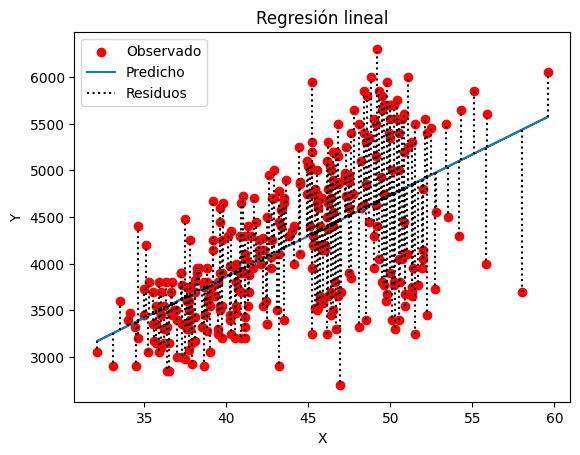

In [ ]:
plt.scatter(x, y, label='Observado', color='r') 
# dispersión simple
plt.plot(x, y_pred, label='Predicho') 
# línea de la regresión
plt.vlines(x, y_pred, y, label='Residuos', ls=':', color='k')
# vlines genera líneas "verticales"
plt.xlabel('X') # formato
plt.ylabel('Y') # formato
plt.title('Regresión lineal') # formato
plt.legend() # formato
plt.show()

Muy bien, ahora, como comentamos en una lección previa, esta tarea es tan usual que muy rara vez tenenmos que hacerla a mano, `scipy` y `seaborn` ya tienen funciones para analizar estos datos. 

## Regresión lineal bivariada (real)
Utilicemos el poder de las librerías para realizar la regresión.

In [18]:
result = stats.linregress(x, y)
result

LinregressResult(slope=np.float64(87.41527705287551), intercept=np.float64(362.30672165392116), rvalue=np.float64(0.59510982443763), pvalue=np.float64(3.808282842018129e-34), stderr=np.float64(6.40198532585216), intercept_stderr=np.float64(283.3452325948302))

`scipy` confirma que nuestros cálculos estaban bien, pero también nos da el valor p y el coeficiente de correlación r. Ahora visualicemos los residuos con `seaborn`.

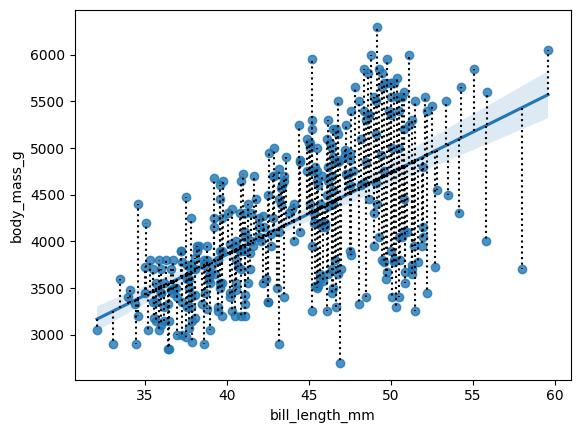

In [ ]:
sns.regplot(x=x, y=y)
# esta parte sí la necesitamos si queremos las líneas verticales
# de los residuos
y_pred = result.intercept + result.slope * x
plt.vlines(x, y_pred, y, label='Residuos', ls=':', color='k') 


## Regresión multivariada
Para modelos más complejos necesitamos utilizar `statsmodels` para modelar la interacción de más variables.
Contemplemos la siguiente fórmula de regresión:

$peso \sim pico + especie$

En este caso necesitamos especificar un modelo más complejo, utilizaremos el modelo de mínimos cuadrados ordinarios.

Observa en la sección de librerías que importamos `statsmodels.api` como `sm`.

In [29]:
datos_completos = df.dropna(subset=['bill_length_mm', 'species', 'body_mass_g'])
y = datos_completos['body_mass_g']
X = datos_completos[['bill_length_mm', 'species']]
# Necesitamos generar variables "dummy" para cada especie
# es decir, una columna por cada especie con 0 y 1.
X = pd.get_dummies(X, columns=['species'], drop_first=True).astype(float)
# Para poder centrar el modelo requerimos añadir una constante.
X = sm.add_constant(X)
modelo = sm.OLS(y, X) # define al modelo
resultado = modelo.fit() # ajusta los datos
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     406.3
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          1.03e-111
Time:                        21:58:10   Log-Likelihood:                -2510.6
No. Observations:                 342   AIC:                             5029.
Df Residuals:                     338   BIC:                             5044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               153.7397    268.90

Como puedes ver el código es bastante complejo, pero no te preocupes, existe una forma más sencilla de realizar esta misma regresión.
La sintaxis de fórmula. Creada para R, esta sintaxis permite que especifiquemos modelos con mucha mayor facilidad.

In [30]:
modelo = sm.OLS.from_formula(
    'body_mass_g ~ bill_length_mm + species', 
    df
)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     406.3
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          1.03e-111
Time:                        22:00:05   Log-Likelihood:                -2510.6
No. Observations:                 342   AIC:                             5029.
Df Residuals:                     338   BIC:                             5044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              153.7397 

Los resultados son exactamente iguales pero no tenemos que quitar los NaN, ni agregar constantes, ni separar a los dummies, nada de eso, porque todo está en nuestra ecuación.